In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('ggplot')
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# PCA

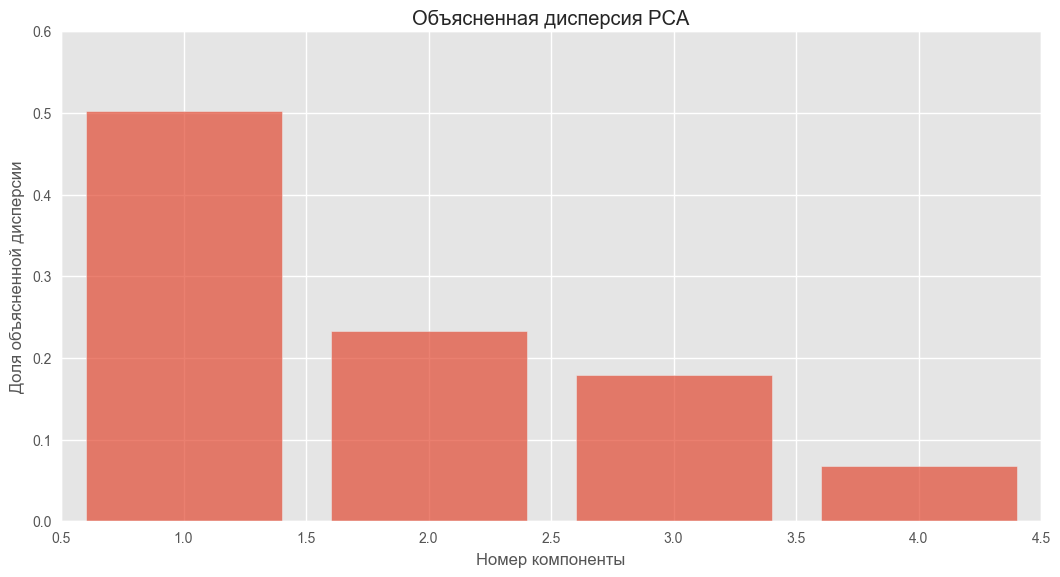

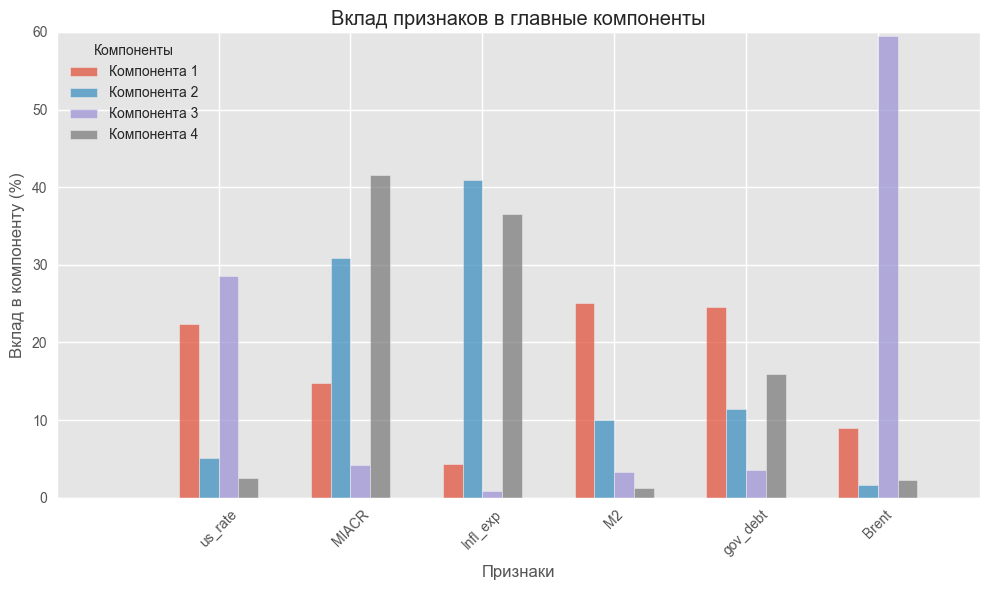


Анализ компоненты 1 (объясняет 50.25% дисперсии):
us_rate влияет на инфляцию со значением 22.35%
MIACR влияет на инфляцию со значением 14.80%
Infl_exp влияет на инфляцию со значением 4.29%
M2 влияет на инфляцию со значением 25.03%
gov_debt влияет на инфляцию со значением 24.56%
Brent влияет на инфляцию со значением 8.97%

Анализ компоненты 2 (объясняет 23.27% дисперсии):
us_rate влияет на инфляцию со значением 5.07%
MIACR влияет на инфляцию со значением 30.87%
Infl_exp влияет на инфляцию со значением 40.94%
M2 влияет на инфляцию со значением 10.07%
gov_debt влияет на инфляцию со значением 11.46%
Brent влияет на инфляцию со значением 1.60%

Анализ компоненты 3 (объясняет 17.92% дисперсии):
us_rate влияет на инфляцию со значением 28.54%
MIACR влияет на инфляцию со значением 4.25%
Infl_exp влияет на инфляцию со значением 0.83%
M2 влияет на инфляцию со значением 3.38%
gov_debt влияет на инфляцию со значением 3.53%
Brent влияет на инфляцию со значением 59.47%

Анализ компоненты 4 (объясняе

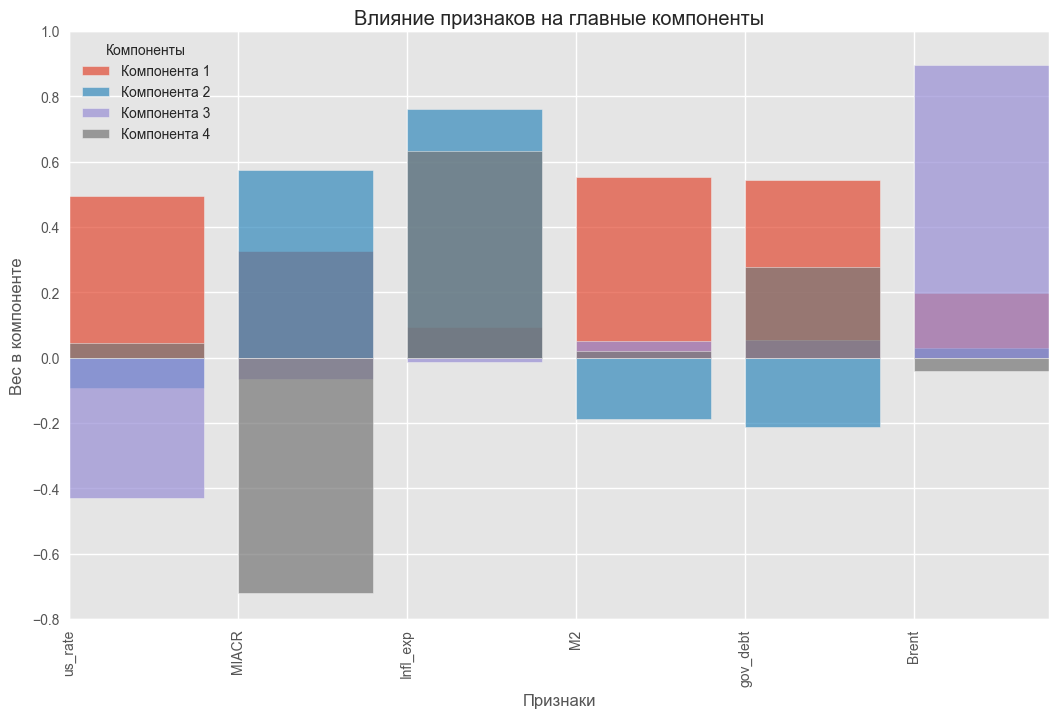

In [181]:
df = pd.read_csv('infl_rus.csv')
df = df.iloc[:, 2:]

# Отделяем целевую переменную (инфляция) и признаки
X = df.drop(columns=["infl_rus"])  # Признаки
y = df["infl_rus"]  # Целевая переменная (инфляция)

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA
# Порог объясняющей дисперсии - 95%
#   Есть альтернативы: критерий "локтя" или критерий Кайзера 
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Анализ результатов
explained_variance = pca.explained_variance_ratio_
loadings = pca.components_

# Визуализация объясненной дисперсии
plt.figure(figsize=(10, 5), dpi=100)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.xlabel('Номер компоненты')
plt.ylabel('Доля объясненной дисперсии')
plt.title('Объясненная дисперсия PCA')
plt.show()

# Вычисляем вклад каждого признака в компоненты (в процентах)
feature_names = X.columns
contributions = []
for i, component in enumerate(loadings):
    contribution = np.abs(component) / np.sum(np.abs(component)) * 100
    contributions.append(contribution)

# Преобразуем в DataFrame для удобства
contributions_df = pd.DataFrame(contributions, columns=feature_names)
contributions_df.index = [f"Компонента {i + 1}" for i in range(len(contributions))]

# Визуализация
plt.figure(figsize=(10, 6), dpi=100)
bar_width = 0.15  # Ширина столбцов
n_components = len(contributions_df)  # Количество компонент
n_features = len(feature_names)  # Количество признаков

# Позиции для столбцов
positions = np.arange(n_features)

for i in range(n_components):
    plt.bar(
        positions + i * bar_width,  # Смещение для каждой компоненты
        contributions_df.iloc[i],   # Вклад признаков в компоненту
        width=bar_width,            # Ширина столбцов
        label=contributions_df.index[i],  # Легенда
        alpha=0.7
    )

# Настройка графика
plt.xticks(positions + (n_components - 1) * bar_width / 2, feature_names, rotation=45)
plt.xlabel("Признаки")
plt.ylabel("Вклад в компоненту (%)")
plt.title("Вклад признаков в главные компоненты")
plt.legend(title="Компоненты", loc='upper left')
plt.tight_layout()
plt.show()


# Вывод влияния параметров на инфляцию
feature_names = X.columns
for i, component in enumerate(loadings):
    print(f"\nАнализ компоненты {i + 1} (объясняет {explained_variance[i] * 100:.2f}% дисперсии):")
    for j, weight in enumerate(component):
        # Вычисляем вклад параметра в компоненту (в процентах)
        contribution = abs(weight) / np.sum(np.abs(component)) * 100
        print(f"{feature_names[j]} влияет на инфляцию со значением {contribution:.2f}%")

# Визуализация весов компонент
plt.figure(figsize=(10, 6), dpi=100)
for i, component in enumerate(loadings):
    plt.bar(feature_names, component, alpha=0.7, label=f'Компонента {i + 1}', align='edge')
plt.xticks(rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Вес в компоненте')
plt.title('Влияние признаков на главные компоненты')
plt.legend(title="Компоненты", loc='upper left')
plt.show()

# МНК

In [183]:
# Пример данных
df = pd.read_csv('infl_rus.csv')
df = df.iloc[:, 2:]

# Отделяем целевую переменную (инфляция) и признаки
X = df.drop(columns=["infl_rus"])  # Признаки
y = df["infl_rus"]  # Целевая переменная (инфляция)

# Добавляем константу (intercept) к признакам
X = sm.add_constant(X)

# Построение модели МНК
model = sm.OLS(y, X)  # Определяем модель
results = model.fit()  # Обучаем модель

# Вывод результатов
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               infl_rus   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     29.74
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           6.15e-22
Time:                        20:54:05   Log-Likelihood:                -111.24
No. Observations:                 132   AIC:                             236.5
Df Residuals:                     125   BIC:                             256.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.5139      0.609    158.554      0.0

Плохая модель, ничего не объясняет толком

# CatBoost

In [43]:
df = pd.read_csv('infl_rus.csv')
df = df.iloc[:, 2:]

# Разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop('infl_rus', axis=1)
y = df['infl_rus']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель CatBoostRegressor
model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, verbose=0)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f'Среднеквадратичная ошибка (MSE): {mse:.4f}')

# Важность признаков
feature_importance = model.get_feature_importance()
feature_names = X.columns

# Вывод важности признаков
print('\nВажность признаков:')
for feature, importance in zip(feature_names, feature_importance):
    print(f'{feature}: {importance:.2f}')

# Интерпретация влияния факторов на инфляцию
total_importance = sum(feature_importance)
print('\nВлияние факторов на инфляцию:')
for feature, importance in zip(feature_names, feature_importance):
    print(f'{feature}: {importance / total_importance * 100:.2f}%')

Среднеквадратичная ошибка (MSE): 2.1491

Важность признаков:
us_rate: 17.96
MIACR: 27.49
Infl_exp: 19.22
M2: 17.71
gov_debt: 13.50
Brent: 4.13

Влияние факторов на инфляцию:
us_rate: 17.96%
MIACR: 27.49%
Infl_exp: 19.22%
M2: 17.71%
gov_debt: 13.50%
Brent: 4.13%
